Human Activity Recognition using TSFEL
On this example, we will perform Human Activity Recognition using our library Time Series Feature Extraction Library.

To perform this example every cell must be executed. To do so click run ([ ]) in the top left of every cell.

The first step consists of importing the library. To do that press play.

The import can take a few seconds, but the run button will change so that you know the import has started and ended.

A warning will appear to reset all runtimes before running, click to accept.

In [1]:
# Import libraries
import tsfel
import glob
import zipfile

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set()

# Unzip dataset
zip_ref = zipfile.ZipFile("UCI-HAR-Dataset.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [2]:
from sklearn.model_selection import train_test_split

Dataset
The dataset we will be using is open-source. It is provided by UCI and it was performed by 30 volunteers using a smartphone on the waist. It contains 6 activities:

Walking
Standing
Sitting
Laying
Upstairs
Downstairs
The dataset used in this example can be found here.

In [3]:
#@title Data Preparation

# Load data
x_train = np.loadtxt('UCI-HAR-Dataset/train/Inertial Signals/total_acc_x_train.txt', dtype='float32')
x_test = np.loadtxt('UCI-HAR-Dataset/test/Inertial Signals/total_acc_x_test.txt', dtype='float32')
y_test = np.loadtxt('UCI-HAR-Dataset/test/y_test.txt')
y_train = np.loadtxt('UCI-HAR-Dataset/train/y_train.txt')
activity_labels = np.array(pd.read_csv('UCI-HAR-Dataset/activity_labels.txt', header=None, delimiter=' '))[:,1]

# dataset sampling frequency
fs = 100

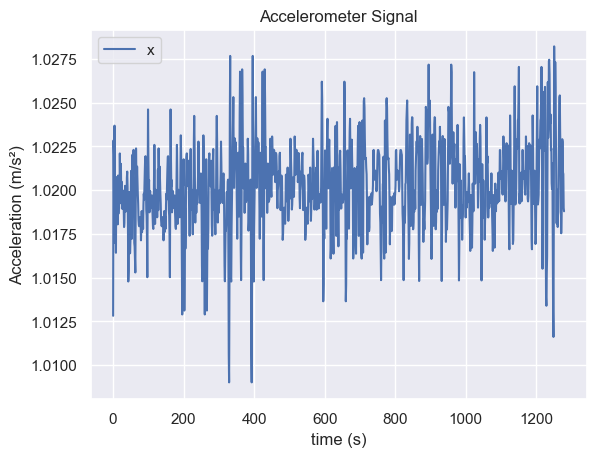

In [4]:
#Signal Preview
%matplotlib inline
plt.figure()
plt_size = 10
plt.plot(np.concatenate(x_train[0:plt_size],axis=0))
plt.xlabel("time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Accelerometer Signal")
plt.legend('x axis')
plt.show()

Feature Extraction
Through Feature Extraction methodologies, the data is translated into a feature vector containing information about the signal properties of each window. These properties can be classified according to their domain as Time, Frequency and Statistical features and allow to characterise the signal compactly, enhancing its characteristics. This features will be used as input to the machine learning classifier, thus, the chosen set of features can strongly influence the classification output.

The features to extract are defined in the google sheet. Save a copy on your local drive and share it with featext@featext.iam.gserviceaccount.com.

Change your google sheet file name and the googleSheet_name variable to your name so both have the same name.

Feature Selection
After the sensor data is extracted, redundancies and noise should be removed. Thus, minimising the algorithm's error, time and computational complexity.

In [5]:
# Highly correlated features are removed


# Remove low variance features
selector = VarianceThreshold()
x_train = selector.fit_transform(x_train)
x_test = selector.transform(x_test)

# Normalising Features
scaler = preprocessing.StandardScaler()
nx_train = scaler.fit_transform(x_train)
nx_test = scaler.transform(x_test)

Classification
In this example the classification is performed with a Random Forest classifier.

In [6]:
classifier = RandomForestClassifier()
# Train the classifier
classifier.fit(nx_train, y_train.ravel())

# Predict test data
y_test_predict = classifier.predict(nx_test)

# Get the classification report
accuracy = accuracy_score(y_test, y_test_predict) * 100
print(classification_report(y_test, y_test_predict, target_names=activity_labels))
print("Accuracy: " + str(accuracy) + '%')

                    precision    recall  f1-score   support

           WALKING       0.77      1.00      0.87       496
  WALKING_UPSTAIRS       0.87      0.77      0.82       471
WALKING_DOWNSTAIRS       0.97      0.77      0.86       420
           SITTING       0.69      0.49      0.57       491
          STANDING       0.63      0.79      0.70       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.81      2947
         macro avg       0.82      0.80      0.80      2947
      weighted avg       0.82      0.81      0.80      2947

Accuracy: 80.72616219884628%


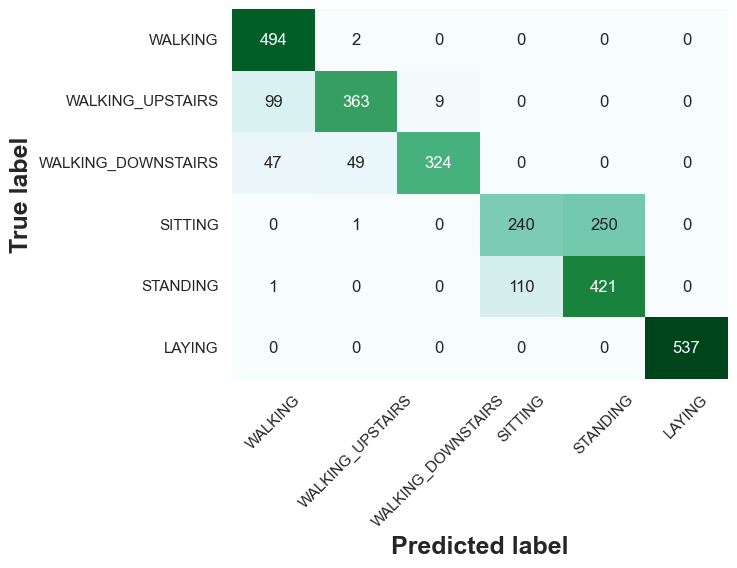

In [7]:
#@title Confusion Matrix
cm = confusion_matrix(y_test, y_test_predict)
df_cm = pd.DataFrame(cm, index=[i for i in activity_labels], columns=[i for i in activity_labels])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.show()

In [8]:
np.savetxt('x_train.csv', x_train, delimiter=',', encoding='utf-8')
np.savetxt('y_train.csv', y_train, delimiter=',', encoding='utf-8')
np.savetxt('x_test.csv', x_test, delimiter=',', encoding='utf-8')
np.savetxt('y_test.csv', y_test, delimiter=',', encoding='utf-8')


Conclusion
As it can be seen in the confusion matrix, the misclassification was higher between WALKING UPSTAIRS vs WALKING DOWNSTAIRS vs WALKING and SITTING vs STANDING. Dynamic activities, due to their distinct motion characteristics and cyclic behaviour, were clearly discriminated against static activities.